In [313]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import re
import glob
import matplotlib.pyplot as plt

In [223]:
%matplotlib inline

In [224]:
fname= glob.glob("NCHS*.csv")[0]

In [316]:
dat = pd.read_csv(fname)

In [226]:


dat['Cause Name'].str.contains('Diseases', flags = re.IGNORECASE).value_counts()

False    14144
True       884
Name: Cause Name, dtype: int64

In [294]:
dat.columns

Index(['Year', 'Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate'], dtype='object')

In [227]:
(dat['Cause Name']).unique()

array(['Unintentional Injuries', 'All Causes', "Alzheimer's disease",
       'Homicide', 'Stroke', 'Chronic liver disease and cirrhosis', 'CLRD',
       'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

### Enter disease name below

In [371]:
disease_name = "Parkinson's disease"

In [373]:
dat_disease = dat[dat['Cause Name'].str.match(disease_name)]

In [229]:
dat_cancer = dat[dat['Cause Name'].str.match('Cancer')]

In [80]:
#dat[dat['Cause Name'].str.match('Stroke')]

In [374]:
dat_disease_group = dat_disease.groupby(by = ['Year', 'State']).agg({'Deaths':sum, 'Age-adjusted Death Rate': sum})

In [375]:
dat_cancer_group = dat_cancer.groupby(by = ['Year', 'State']).agg({'Deaths':sum, 'Age-adjusted Death Rate': sum})

In [376]:
dat_disease_group.index.get_level_values('Year')#.str.match('United States')

Int64Index([1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='Year', length=884)

In [389]:
#dat_disease_group[np.in1d(dat_disease_group.index.get_level_values(1), 'United States')]

In [390]:
#dat_disease_group[~np.in1d(dat_disease_group.index.get_level_values(1), 'United States')].groupby('Year').agg({'Deaths': sum})

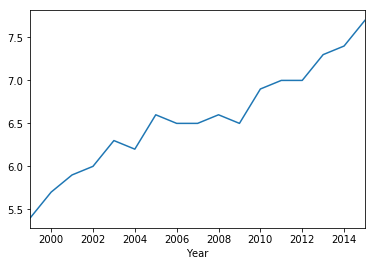

In [379]:
dat_disease_group['Age-adjusted Death Rate'].xs('United States', level = 1, drop_level= True).plot()

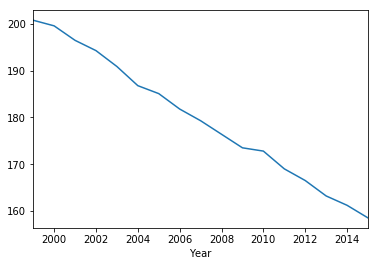

In [353]:
dat_cancer_group['Age-adjusted Death Rate'].xs('United States', level = 1, drop_level= True).plot()

# Organic milk dataset

In [207]:
milk = pd.read_csv('AMSMilksalesvolumeestimates.csv', skipfooter= 5, skiprows=1, na_values= ['', ' '])

c:\users\vishal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [208]:
#milk.iloc[:, milk.columns[0:8]]

sum([(float(i)) for i in milk[list(milk.columns[2:14])].iloc[2].values.tolist()])

2264.0

In [209]:
milk = milk.drop(milk.columns[[15]], axis=1)

In [210]:
milk = milk.drop(milk.index[[0,1]]).reset_index()

In [211]:
milk = milk.drop(['index'], axis = 1)

In [213]:
milk.columns = map(str.strip, milk.columns)
milk.columns

Index(['Unnamed: 0', 'Year', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'Sept.', 'October', 'November', 'December',
       'Jan-'],
      dtype='object')

In [214]:
milk = milk.rename(columns= {'Unnamed: 0': 'desc', 'Jan-': 'Total'})

In [217]:
milk['Year'] = milk['Year'].fillna(method = 'ffill')

In [218]:
x = milk[milk['desc'].str.contains('%')]

In [238]:
x

,desc,Year,January,February,March,April,May,June,July,August,Sept.,October,November,December,Total
2,Organic milk/Total milk (%),2013.0,4.13,3.93,4.24,4.4,4.49,4.64,4.65,4.48,4.44,4.31,4.4,4.53,4.38
5,Organic milk/Total milk (%),2012.0,4.11,4.23,4.08,3.89,4.12,4.17,3.97,4.23,3.95,4.2,4.27,3.87,4.09
8,Organic milk/Total milk (%),2011.0,3.55,3.67,3.91,3.85,3.82,3.95,3.98,3.84,4.07,3.85,3.87,3.98,3.86
11,Organic milk/Total milk (%),2010.0,2.86,2.87,3.19,3.15,3.14,3.54,3.54,3.5,3.65,3.37,3.52,3.55,3.32
14,Organic milk/Total milk (%),2009.0,2.76,2.86,2.97,2.74,2.75,3.09,3.04,2.88,3,2.88,2.89,2.83,2.89
17,Organic milk/Total milk (%),2008.0,2.95,3.38,3.02,2.94,3,3.13,3.01,3.11,3.12,2.99,2.86,3.11,3.05
20,Organic milk/Total milk (%),2007.0,2.35,2.36,2.35,2.35,2.4,2.7,2.58,2.76,2.63,2.8,2.85,2.66,2.56
23,Organic milk/Total milk (%),2006.0,1.73,1.53,1.8,1.81,2.05,2.21,1.92,1.95,1.94,2.05,2.06,2,1.92


In [265]:
organic_total_ratio = x.loc[:, ["Total", "Year"]].sort_values("Year")
organic_total_ratio

,Total,Year
23,1.92,2006.0
20,2.56,2007.0
17,3.05,2008.0
14,2.89,2009.0
11,3.32,2010.0
8,3.86,2011.0
5,4.09,2012.0
2,4.38,2013.0


In [266]:
organic_total_ratio["Total"] = pd.to_numeric(organic_total_ratio['Total'])

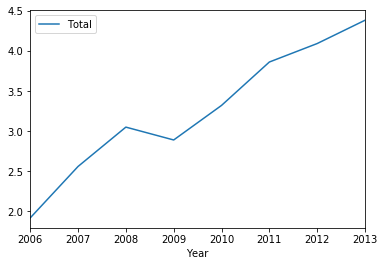

In [267]:
organic_total_ratio.plot(y='Total', x='Year')

### looking for correlation

In [383]:
disease = dat_suicide_group['Deaths'].xs('United States', level = 1, drop_level= True)
disease = pd.DataFrame(disease).reset_index()

In [384]:
disease_date_trimmed = disease[(disease['Year'] >= 2006) & (disease['Year'] <= 2013)]

In [305]:
organic_total_ratio

,Total,Year
23,1.92,2006.0
20,2.56,2007.0
17,3.05,2008.0
14,2.89,2009.0
11,3.32,2010.0
8,3.86,2011.0
5,4.09,2012.0
2,4.38,2013.0


In [385]:
disease_date_trimmed

,Year,Deaths
7,2006,19566.0
8,2007,20058.0
9,2008,20483.0
10,2009,20565.0
11,2010,22032.0
12,2011,23111.0
13,2012,23818.0
14,2013,25196.0


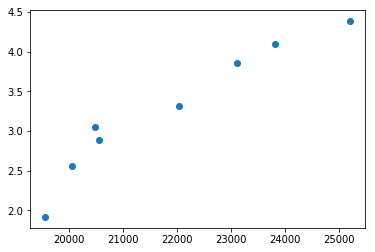

In [386]:
plt.scatter(disease_date_trimmed["Deaths"], organic_total_ratio["Total"])

In [387]:
organic_total_ratio["Total"].corr(disease_date_trimmed["Deaths"])

-0.98040101346029074

In [388]:
pearsonr(organic_total_ratio["Total"], disease_date_trimmed["Deaths"])

(0.96011368633827909, 0.00015393183228136769)